In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Cargar el dataset limpio que el usuario subió
df_tweets_negativos = pd.read_csv('/home/jhonfypy/TwitterUSAirlinesSentiment/ProyectoTwist/data/tweets_negativos_limpios.csv', encoding='utf-8', parse_dates=['tweet_created'])

In [6]:
# Enriquecimiento de variables internas

# Longitud del tweet
df_tweets_negativos['tweet_length'] = df_tweets_negativos['text'].astype(str).apply(len)

In [7]:
# Cantidad de hashtags
df_tweets_negativos['hashtag_count'] = df_tweets_negativos['text'].astype(str).apply(lambda x: x.count('#'))

In [8]:
# Cantidad de menciones (@)
df_tweets_negativos['mention_count'] = df_tweets_negativos['text'].astype(str).apply(lambda x: x.count('@'))

In [9]:
# Cantidad de menciones (@)
df_tweets_negativos['mention_count'] = df_tweets_negativos['text'].astype(str).apply(lambda x: x.count('@'))

In [10]:
# Extraer hora, día de la semana y mes del tweet
df_tweets_negativos['hour'] = df_tweets_negativos['tweet_created'].dt.hour
df_tweets_negativos['day_of_week'] = df_tweets_negativos['tweet_created'].dt.day_name()
df_tweets_negativos['month'] = df_tweets_negativos['tweet_created'].dt.month_name()

# Vista previa de las nuevas variables
df_tweets_negativos.head(10)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,tweet_length,hashtag_count,mention_count,hour,day_of_week,month
0,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada),126,0,1,11,Tuesday,February
1,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada),55,0,1,11,Tuesday,February
2,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,NaN,Pacific Time (US & Canada),135,0,1,11,Tuesday,February
3,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,0,@VirginAmerica SFO-PDX schedule is still MIA.,2015-02-24 10:01:50-08:00,"palo alto, ca",Pacific Time (US & Canada),45,0,1,10,Tuesday,February
4,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica I flew from NYC to SFO last we...,2015-02-24 09:39:46-08:00,this place called NYC,Eastern Time (US & Canada),137,0,1,9,Tuesday,February
5,570265883513384960,negative,0.6705,Can't Tell,0.3614,Virgin America,0,@VirginAmerica why are your first fares in May...,2015-02-24 08:55:56-08:00,NaN,NaN,130,0,1,8,Tuesday,February
6,570256553502068736,negative,1.0000,Customer Service Issue,0.3557,Virgin America,0,@VirginAmerica you guys messed up my seating.....,2015-02-24 08:18:51-08:00,714,Mountain Time (US & Canada),139,0,1,8,Tuesday,February
7,570249102404923392,negative,1.0000,Customer Service Issue,1.0000,Virgin America,0,@VirginAmerica status match program. I applie...,2015-02-24 07:49:15-08:00,NaN,NaN,112,0,1,7,Tuesday,February
8,570239632807370753,negative,1.0000,Can't Tell,0.6614,Virgin America,0,@VirginAmerica What happened 2 ur vegan food o...,2015-02-24 07:11:37-08:00,NaN,NaN,140,1,1,7,Tuesday,February
9,570207886493782019,negative,1.0000,Bad Flight,1.0000,Virgin America,0,@VirginAmerica amazing to me that we can't get...,2015-02-24 05:05:28-08:00,"San Mateo, CA & Las Vegas, NV",NaN,125,5,1,5,Tuesday,February


In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

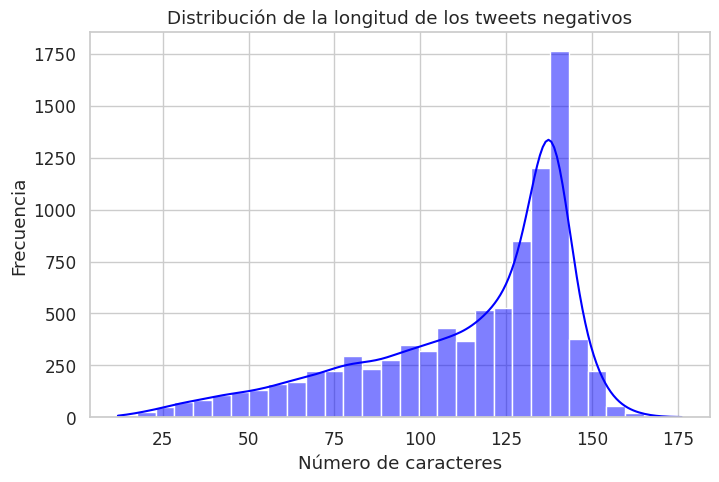

In [12]:
# 1. Distribución de longitudes de tweets
plt.figure(figsize=(8,5))
sns.histplot(df_tweets_negativos['tweet_length'], bins=30, kde=True, color="blue")
plt.title("Distribución de la longitud de los tweets negativos")
plt.xlabel("Número de caracteres")
plt.ylabel("Frecuencia")
plt.show()

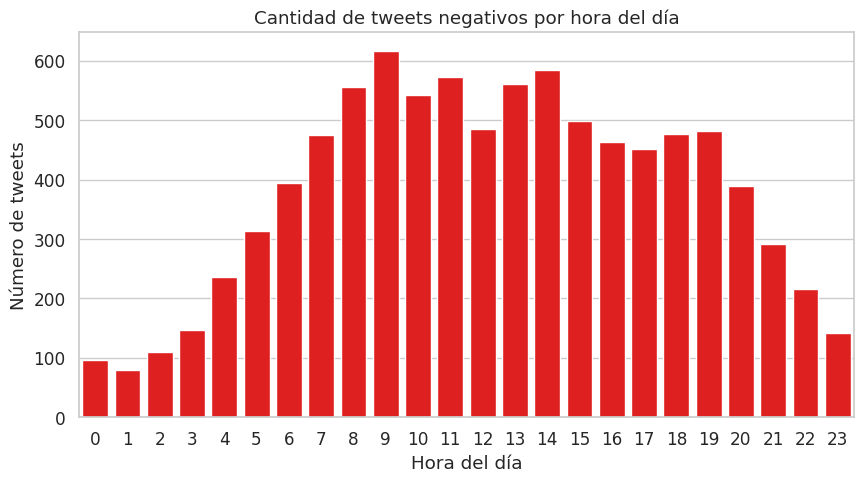

In [13]:
# 2. Tweets por hora del día
plt.figure(figsize=(10,5))
sns.countplot(data=df_tweets_negativos, x='hour', color="red")
plt.title("Cantidad de tweets negativos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de tweets")
plt.show()


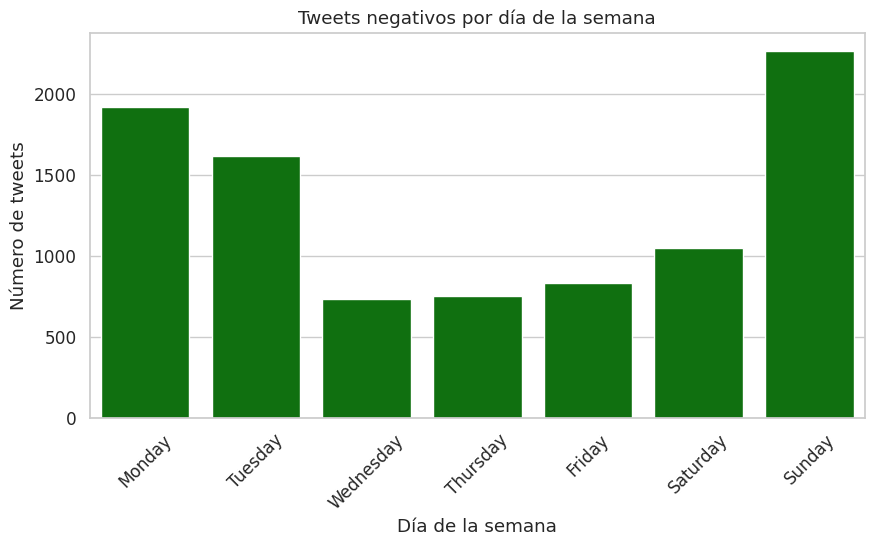

In [14]:
# 3. Tweets por día de la semana
plt.figure(figsize=(10,5))
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(data=df_tweets_negativos, x='day_of_week', order=order_days, color="green")
plt.title("Tweets negativos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de tweets")
plt.xticks(rotation=45)
plt.show()


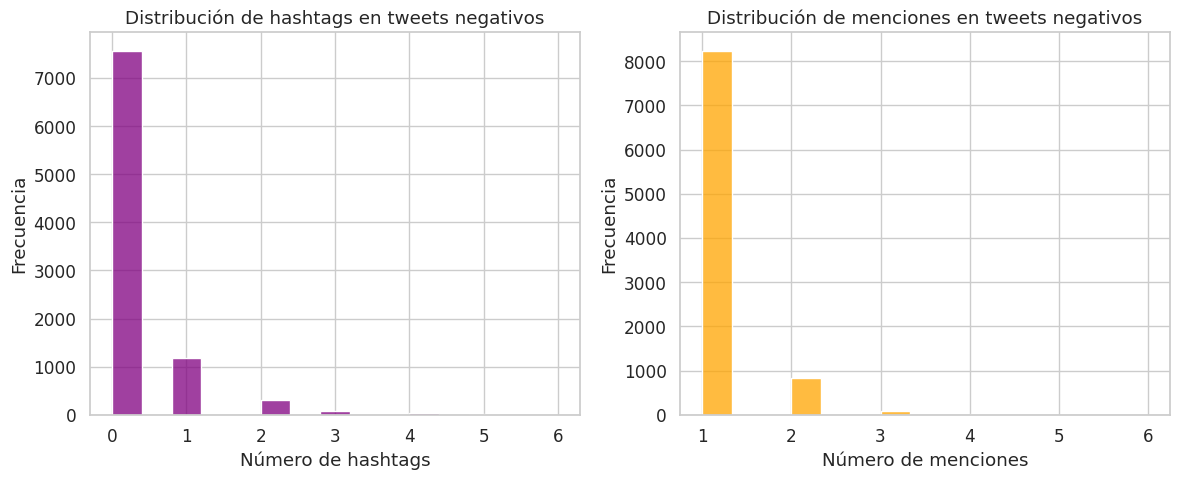

In [15]:
# 4. Hashtags y menciones
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df_tweets_negativos['hashtag_count'], bins=15, kde=False, ax=axes[0], color="purple")
axes[0].set_title("Distribución de hashtags en tweets negativos")
axes[0].set_xlabel("Número de hashtags")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_tweets_negativos['mention_count'], bins=15, kde=False, ax=axes[1], color="orange")
axes[1].set_title("Distribución de menciones en tweets negativos")
axes[1].set_xlabel("Número de menciones")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


In [17]:
# 2) Asegurar columnas de enriquecimiento clave (por si no están)
if 'tweet_length' not in df_tweets_negativos.columns:
    df_tweets_negativos['tweet_length'] = df_tweets_negativos['text'].astype(str).apply(len)
if 'hashtag_count' not in df_tweets_negativos.columns:
    df_tweets_negativos['hashtag_count'] = df_tweets_negativos['text'].astype(str).apply(lambda x: x.count('#'))
if 'mention_count' not in df_tweets_negativos.columns:
    df_tweets_negativos['mention_count'] = df_tweets_negativos['text'].astype(str).apply(lambda x: x.count('@'))
if 'hour' not in df_tweets_negativos.columns:
    df_tweets_negativos['hour'] = df_tweets_negativos['tweet_created'].dt.hour
if 'day_of_week' not in df_tweets_negativos.columns:
    df_tweets_negativos['day_of_week'] = df_tweets_negativos['tweet_created'].dt.day_name()
if 'month' not in df_tweets_negativos.columns:
    df_tweets_negativos['month'] = df_tweets_negativos['tweet_created'].dt.month_name()

In [18]:
# 3) Orden lógico de días
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df_tweets_negativos['day_of_week'] = pd.Categorical(df_tweets_negativos['day_of_week'], categories=order_days, ordered=True)

In [19]:
order_days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [20]:
# 4) Tabla dinámica: tweets negativos por aerolínea y día de la semana
pivot_airline_day = (
    df_tweets_negativos
    .groupby(['airline','day_of_week'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=order_days)
    .sort_index()
)


/tmp/ipykernel_2621/1663508918.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['airline','day_of_week'])


In [21]:
# 5) Mostrar tabla al usuario
display(pivot_airline_day.reset_index())

day_of_week,airline,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,American,826,369,1,0,1,1,762
1,Delta,126,145,105,135,91,98,255
2,Southwest,116,315,110,127,132,257,129
3,US Airways,372,354,244,193,248,291,561
4,United,451,414,257,272,342,365,532
5,Virgin America,31,22,19,24,21,37,27


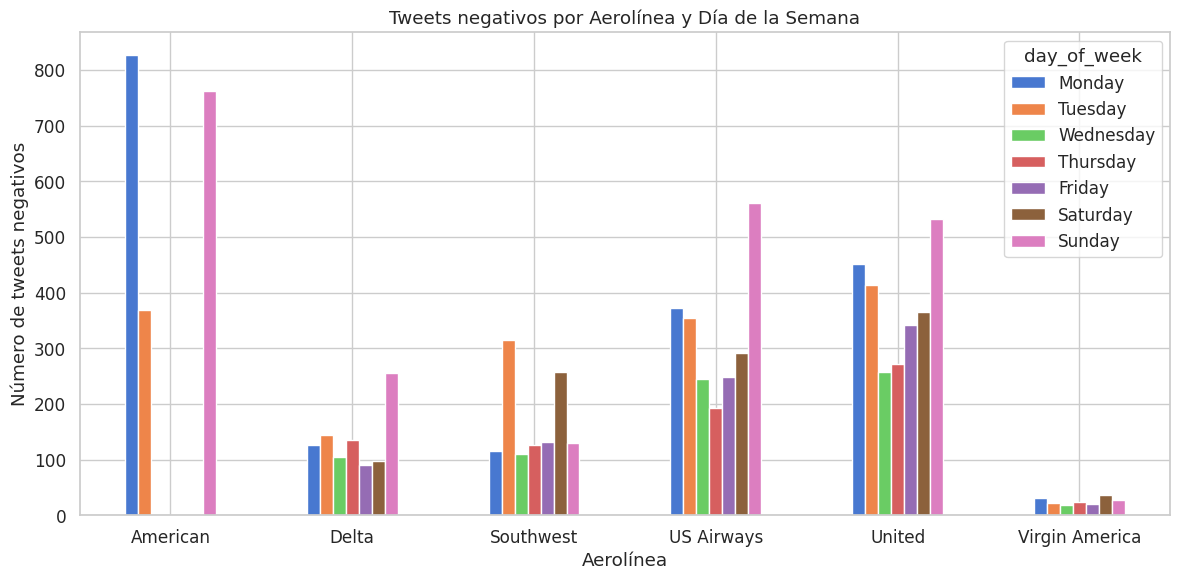

In [22]:
# 6) Gráfico: barras agrupadas por aerolínea (una barra por día de la semana)
ax = pivot_airline_day.plot(kind='bar', figsize=(12, 6))
ax.set_title("Tweets negativos por Aerolínea y Día de la Semana")
ax.set_xlabel("Aerolínea")
ax.set_ylabel("Número de tweets negativos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [23]:
# 1) Asegurar columna 'hour'
if 'hour' not in df_tweets_negativos.columns:
    df_tweets_negativos['hour'] = df_tweets_negativos['tweet_created'].dt.hour

# 2) Tabla dinámica
pivot_airline_hour = (
    df_tweets_negativos
    .groupby(['airline','hour'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# 3) Mostrar tabla
display(pivot_airline_hour.reset_index())



hour,airline,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,American,34,28,31,48,65,67,66,85,83,...,125,110,114,114,112,94,65,57,53,39
1,Delta,6,2,2,6,26,36,35,63,61,...,78,61,54,58,54,58,39,24,7,7
2,Southwest,4,5,7,6,23,36,69,70,103,...,83,63,50,63,55,59,37,25,9,4
3,US Airways,15,19,17,45,59,87,112,130,160,...,123,93,105,92,111,111,136,72,50,40
4,United,37,23,51,40,61,83,111,121,135,...,164,165,136,110,141,159,108,109,90,50
5,Virgin America,1,3,1,1,2,4,2,6,14,...,12,7,4,14,4,1,4,4,6,2


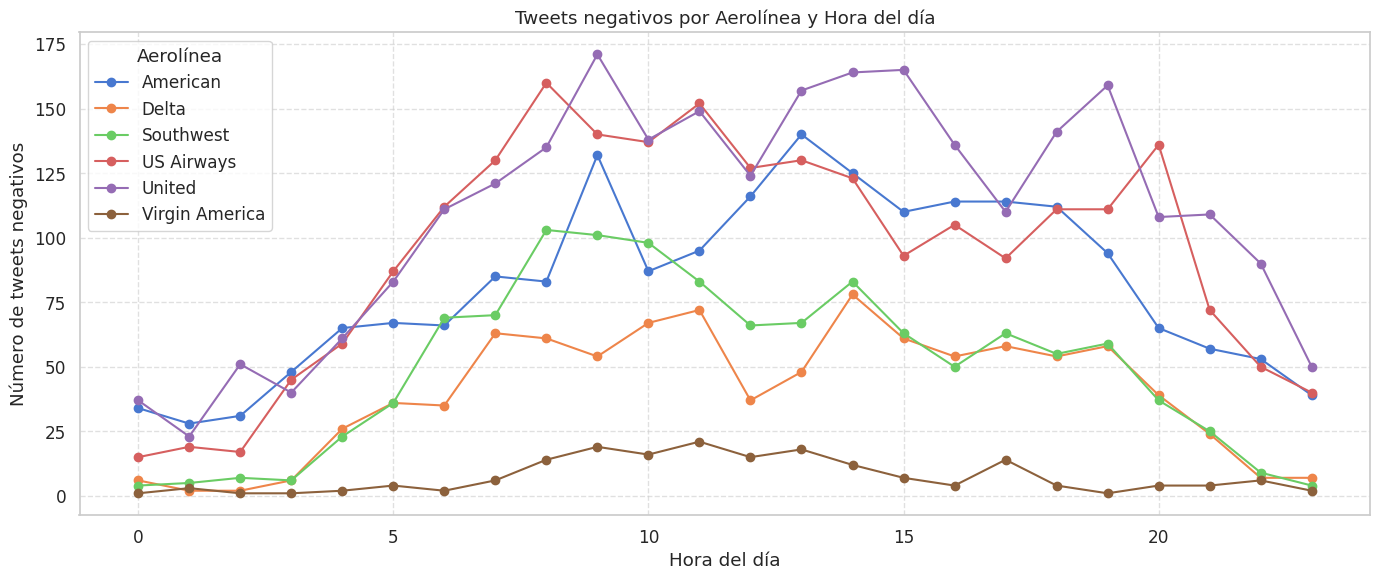

In [24]:
# 4) Gráfico
plt.figure(figsize=(14, 6))
for airline in pivot_airline_hour.index:
    plt.plot(
        pivot_airline_hour.columns,
        pivot_airline_hour.loc[airline],
        marker='o',
        label=airline
    )
    
plt.title("Tweets negativos por Aerolínea y Hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de tweets negativos")
plt.legend(title="Aerolínea")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## Modelo de aprendizaje supervisado

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from collections import Counter
from sklearn.mixture import GaussianMixture

In [26]:
X = df_tweets_negativos['text']
y = df_tweets_negativos['airline_sentiment']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])

Pipeline.fit(X_train, y_train)
y_pred = Pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6083877995642701


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

X = df_tweets_negativos['text']
y = df_tweets_negativos['negativereason']  # o 'airline_sentiment'

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5, ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

pipe.fit(Xtr, ytr)
pred = pipe.predict(Xte)
print(classification_report(yte, pred))


                             precision    recall  f1-score   support

                 Bad Flight       0.61      0.26      0.36       116
                 Can't Tell       0.42      0.35      0.38       238
           Cancelled Flight       0.80      0.68      0.74       169
     Customer Service Issue       0.56      0.83      0.67       582
            Damaged Luggage       0.00      0.00      0.00        15
Flight Attendant Complaints       0.68      0.22      0.33        96
    Flight Booking Problems       0.76      0.21      0.33       106
                Late Flight       0.64      0.77      0.70       333
               Lost Luggage       0.77      0.63      0.70       145
                  longlines       1.00      0.03      0.05        36

                   accuracy                           0.60      1836
                  macro avg       0.62      0.40      0.43      1836
               weighted avg       0.62      0.60      0.57      1836



/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

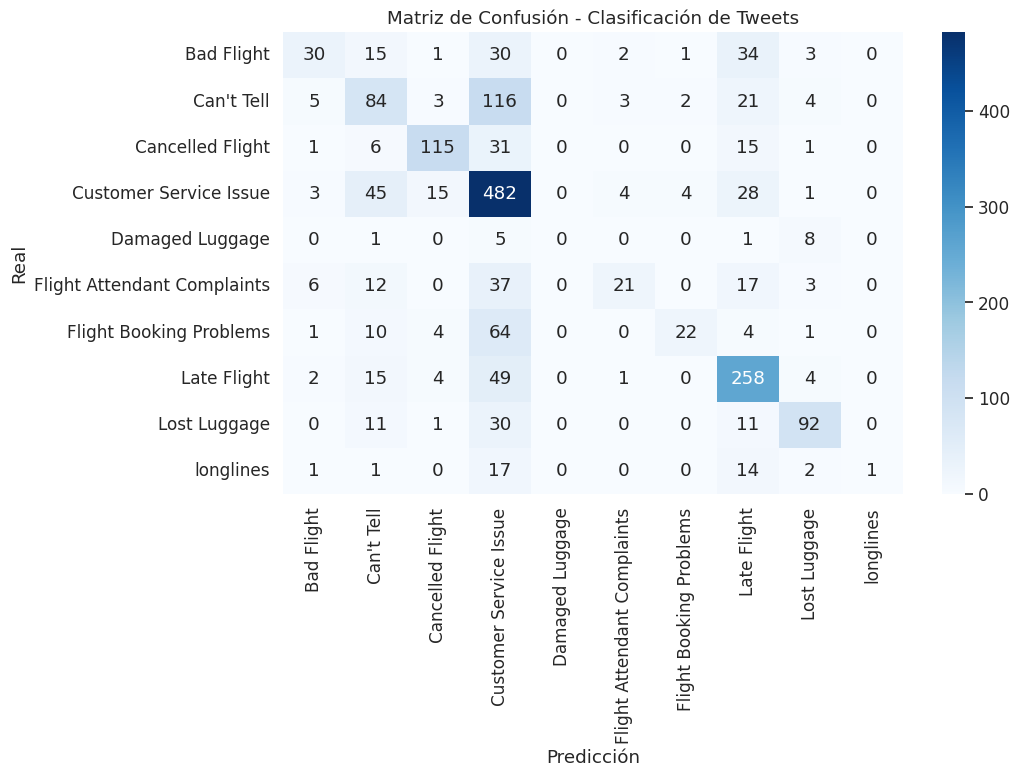

/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jhonfypy/anaconda3/envs/USAirlineSenti/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

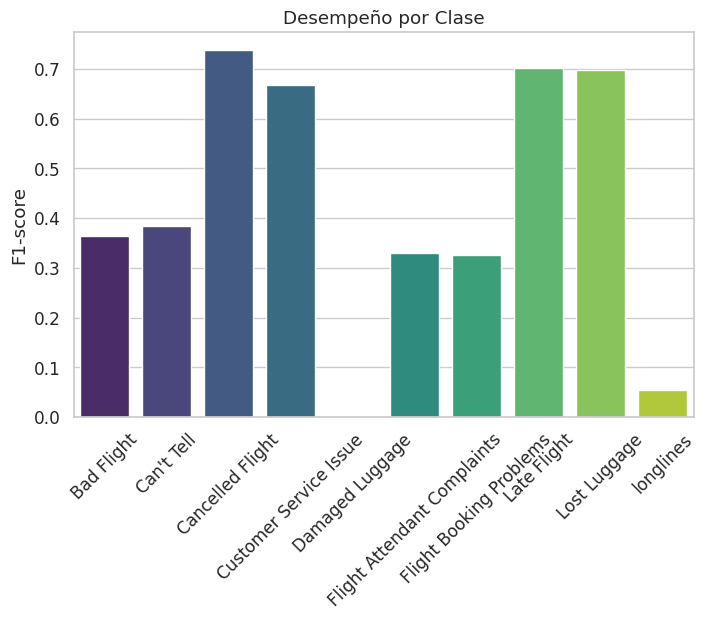

In [40]:
# Predicciones del modelo supervisado (ejemplo con Regresión Logística)
y_pred = pipe.predict(Xte)

# 🔹 Matriz de Confusión
cm = confusion_matrix(yte, y_pred, labels=pipe.classes_)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=pipe.classes_, yticklabels=pipe.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Clasificación de Tweets")
plt.show()

# 🔹 F1 por clase
report = classification_report(yte, y_pred, output_dict=True)
f1_scores = {cls: report[cls]['f1-score'] for cls in pipe.classes_}

plt.figure(figsize=(8,5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("F1-score")
plt.title("Desempeño por Clase")
plt.show()

## Modelo No supervisado 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

tfidf = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1,2))
X = tfidf.fit_transform(df_tweets_negativos['text'])

kmeans = KMeans(n_clusters=6, n_init=20, random_state=42)
labels = kmeans.fit_predict(X)
df_tweets_negativos['cluster'] = labels

df_tweets_negativos['cluster'] = labels

# Opcional: proyección 2D para visualizar
pca = PCA(n_components=2, random_state=42).fit_transform(X.toarray()[:3000])  # muestrar si X es grande


In [36]:
pca
labels

array([0, 0, 0, ..., 0, 0, 1], shape=(9178,), dtype=int32)

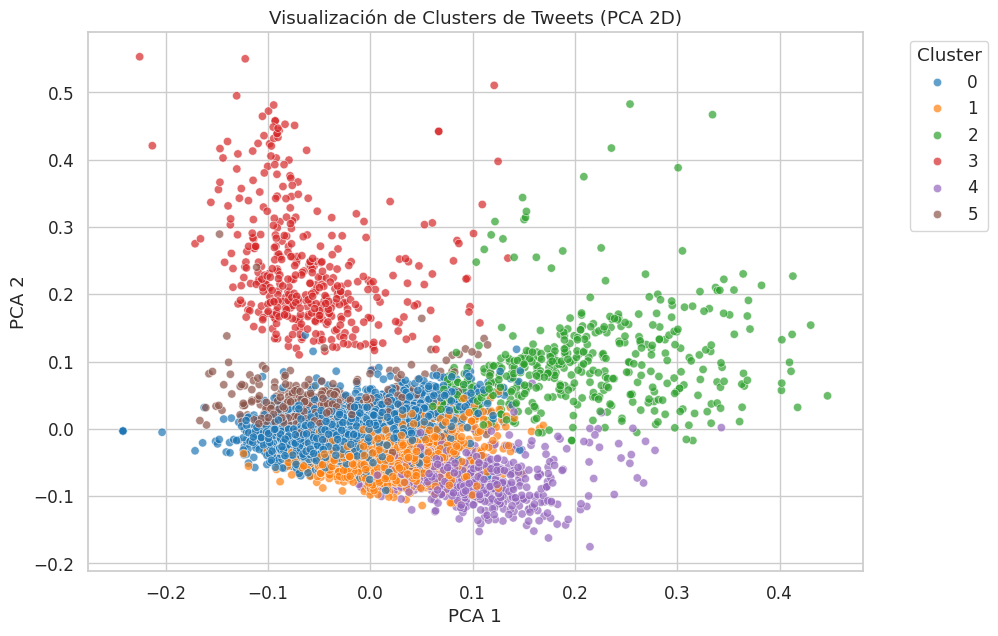

In [42]:
# 🔹 Proyección PCA a 2D
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=labels, palette="tab10", alpha=0.7)
plt.title("Visualización de Clusters de Tweets (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

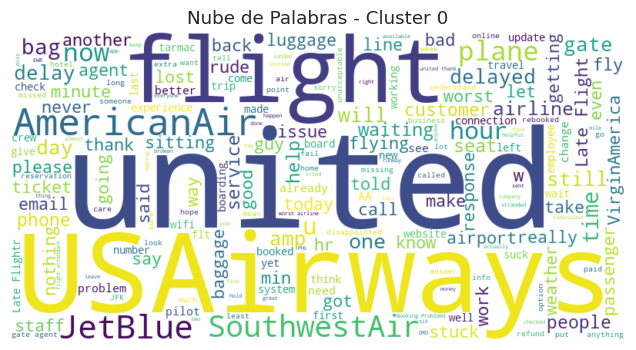

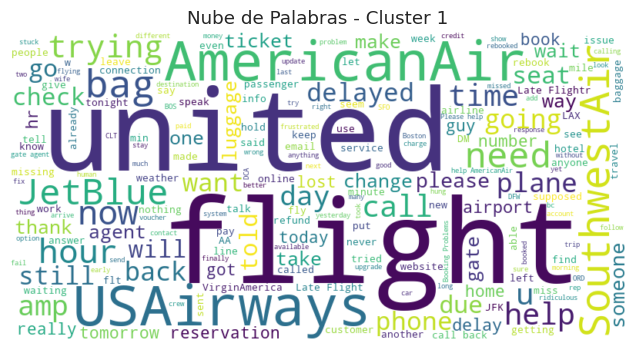

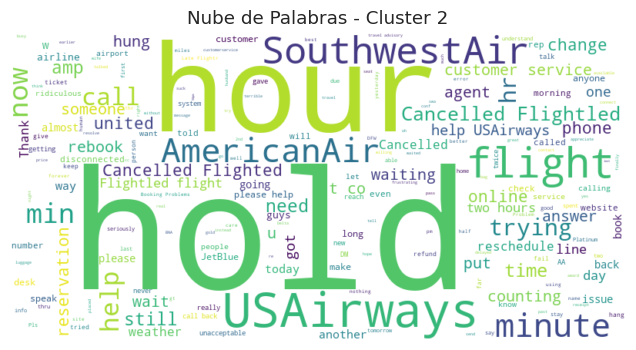

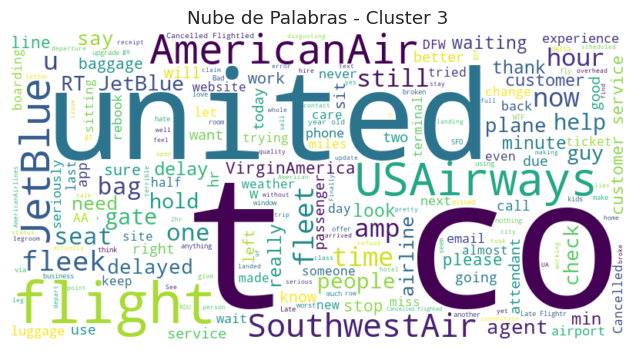

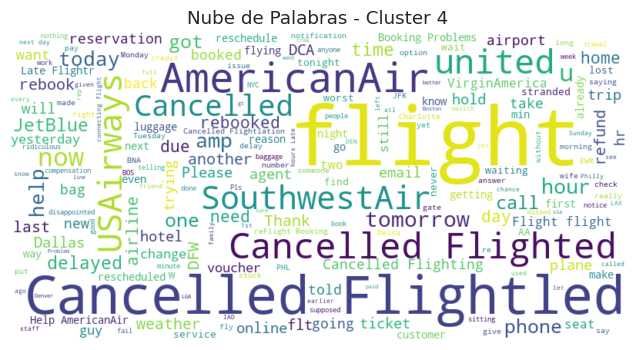

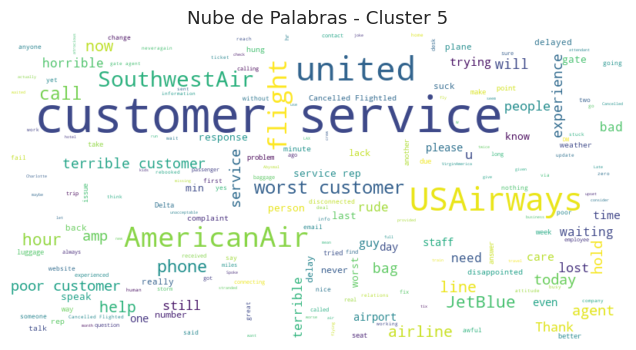

In [45]:
from wordcloud import WordCloud

for cluster in set(labels):
    text_cluster = " ".join(df_tweets_negativos[df_tweets_negativos['cluster']==cluster]['text'])
    wc = WordCloud(width=800, height=400, background_color="white").generate(text_cluster)
    
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de Palabras - Cluster {cluster}")
    plt.show()


# Clustering y Detección de Anomalías en Datos de Negocios

In [47]:
# Vectorización de texto con TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df_tweets_negativos['text'])

# Clustering con K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Guardamos los clusters en el dataset
df_tweets_negativos['cluster'] = labels

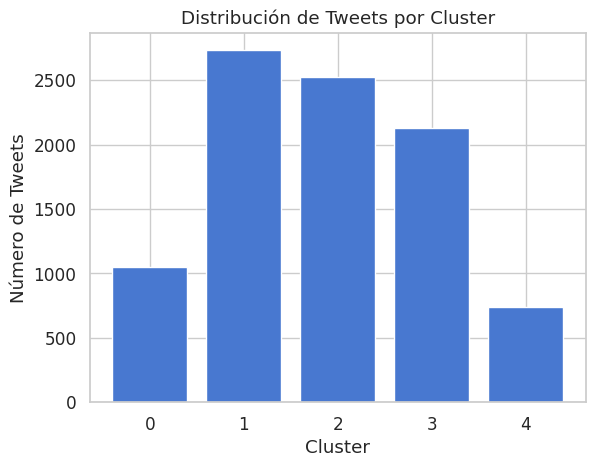

In [48]:
from collections import Counter

plt.bar(Counter(labels).keys(), Counter(labels).values())
plt.xlabel("Cluster")
plt.ylabel("Número de Tweets")
plt.title("Distribución de Tweets por Cluster")
plt.show()

In [51]:
# Entrenamos el modelo
iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(X.toarray())  # -1 = anomalía, 1 = normal

# Guardamos en el dataset
df_tweets_negativos['anomaly'] = outliers

In [53]:
print("Número de anomalías detectadas:", (df_tweets_negativos['anomaly']==-1).sum())

# Ejemplo de tweets anómalos
df_tweets_negativos[df_tweets_negativos['anomaly']==-1][['text']].head(10)


Número de anomalías detectadas: 184


,text
32,@VirginAmerica - Let 2 scanned in passengers l...
43,@VirginAmerica I like the customer service but...
51,@VirginAmerica You'd think paying an extra $10...
188,@united I did start a claim but 8-10 weeks is ...
209,"@united No, I need you guys to not over book p..."
238,@united why am I to believe they will help whe...
249,@united Blackmailed me into paying £130 extra ...
283,@united very unhappy at no response to complai...
346,@united on 4124 arriving two hours Late Flight...
423,@united I send an email about my bad experienc...


## Detección de anomalías en tus tweets?

Vectorizar los tweets en números (usando TF-IDF).

Aplicar Isolation Forest para detectar outliers (tweets anómalos).

Explorar los tweets detectados como anomalías.

In [54]:
# Vectorizar tweets
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df_tweets_negativos['text'])

# Modelo de detección de anomalías
iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(X.toarray())  # -1 = anomalía, 1 = normal

# Guardar en el dataframe
df_tweets_negativos['anomaly'] = outliers

print("Número de anomalías detectadas:", (df_tweets_negativos['anomaly'] == -1).sum())
print("Número de tweets normales:", (df_tweets_negativos['anomaly'] == 1).sum())


Número de anomalías detectadas: 184
Número de tweets normales: 8994


In [56]:
print('Twits Raros')
df_tweets_negativos[df_tweets_negativos['anomaly'] == -1][['text']].head(15)

Twits Raros


,text
32,@VirginAmerica - Let 2 scanned in passengers l...
43,@VirginAmerica I like the customer service but...
51,@VirginAmerica You'd think paying an extra $10...
188,@united I did start a claim but 8-10 weeks is ...
209,"@united No, I need you guys to not over book p..."
238,@united why am I to believe they will help whe...
249,@united Blackmailed me into paying £130 extra ...
283,@united very unhappy at no response to complai...
346,@united on 4124 arriving two hours Late Flight...
423,@united I send an email about my bad experienc...


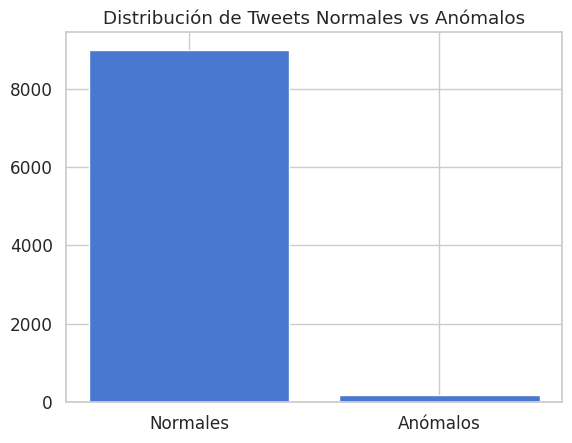

In [57]:
counts = df_tweets_negativos['anomaly'].value_counts()
plt.bar(['Normales', 'Anómalos'], counts)
plt.title("Distribución de Tweets Normales vs Anómalos")
plt.show()

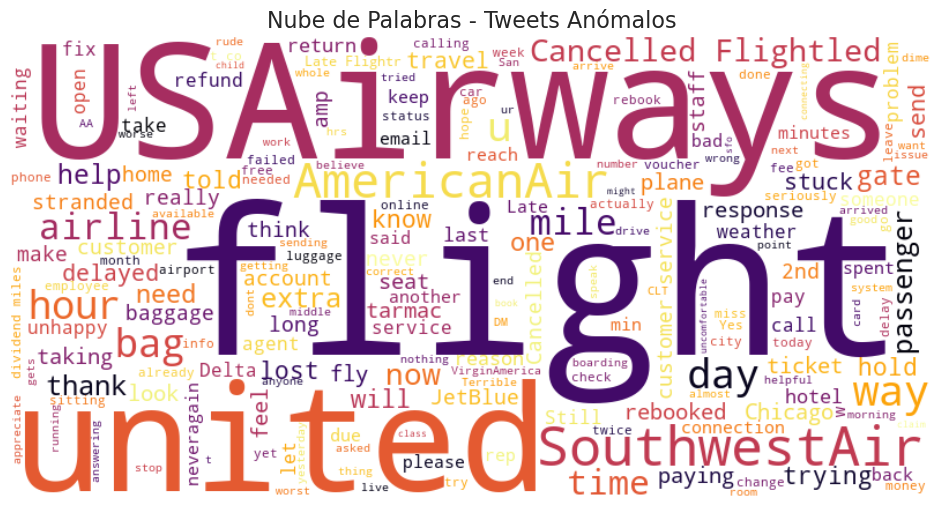

In [58]:
# Concatenar todos los tweets anómalos en un solo texto
anom_text = " ".join(df_tweets_negativos[df_tweets_negativos['anomaly'] == -1]['text'].astype(str))

# Generar la nube de palabras
wc = WordCloud(width=800, height=400, background_color="white", colormap="inferno").generate(anom_text)

# Mostrar la nube
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras - Tweets Anómalos", fontsize=16)
plt.show()

## Detección de Anomalías en Datos con Modelos Gaussianos

#### A diferencia de Isolation Forest (que es más “no paramétrico”), los modelos gaussianos asumen que los datos provienen de una distribución normal (o mezcla de normales). 

#### Esto se usa mucho cuando los datos tienen cierta estructura continua.

In [62]:
# Vectorizamos los tweets con TF-IDF (representación numérica del texto)
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df_tweets_negativos['text'].astype(str))

# Ajustamos un modelo Gaussiano con 2 componentes: "normal" y "anómalo"
gmm = GaussianMixture(n_components=2, covariance_type="full", random_state=42)
gmm.fit(X.toarray())

# Obtenemos las probabilidades de pertenencia a cada cluster
scores = gmm.score_samples(X.toarray())

# Umbral: consideramos anomalías los tweets con menor log-probabilidad
threshold = np.percentile(scores, 5)  # 5% más raros
df_tweets_negativos['gaussian_anomaly'] = (scores < threshold).astype(int)

# Conteo de anomalías detectadas
print(df_tweets_negativos['gaussian_anomaly'].value_counts())

gaussian_anomaly
0    8719
1     459
Name: count, dtype: int64


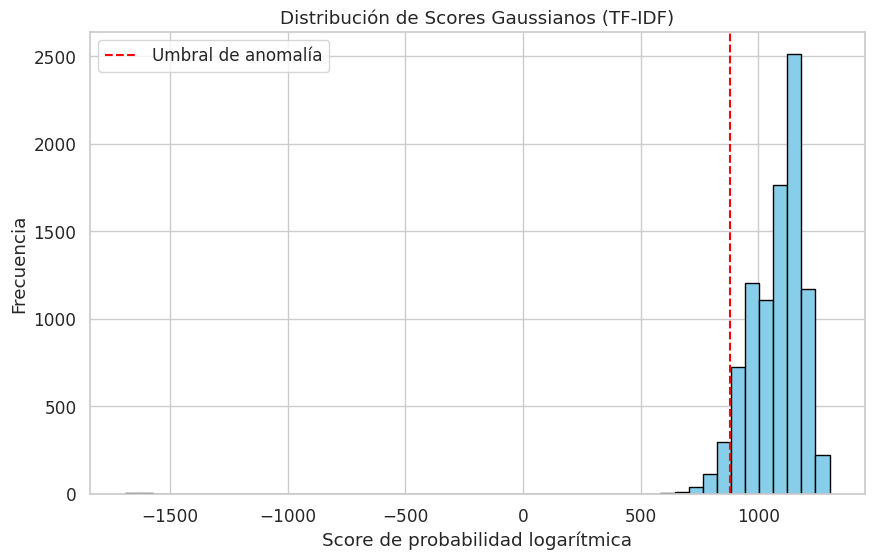

In [63]:
plt.figure(figsize=(10,6))
plt.hist(scores, bins=50, color="skyblue", edgecolor="black")
plt.axvline(threshold, color="red", linestyle="--", label="Umbral de anomalía")
plt.title("Distribución de Scores Gaussianos (TF-IDF)")
plt.xlabel("Score de probabilidad logarítmica")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


- Los tweets a la izquierda del umbral (rojo) serán los anómalos.

- Esto te permite comparar con Isolation Forest y ver si ambos detectan los mismos "raros".

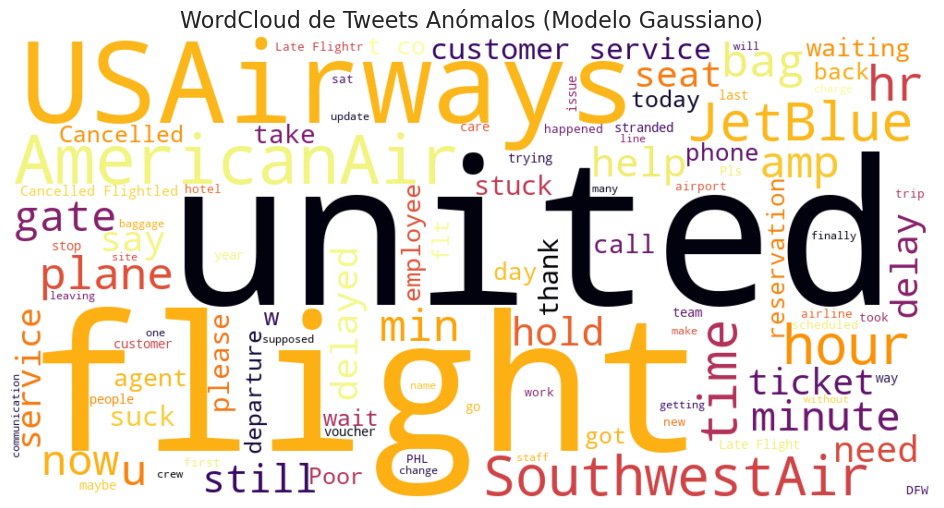

In [64]:
from wordcloud import WordCloud

# Filtrar solo los tweets anómalos
anom_tweets = df_tweets_negativos[df_tweets_negativos['gaussian_anomaly'] == 1]['text']

# Unir todos los textos en un solo string
anom_text = " ".join(anom_tweets.astype(str))

# Crear la nube de palabras
wc = WordCloud(width=1000, height=500, background_color="white",
               colormap="inferno", max_words=100).generate(anom_text)

# Mostrar la WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud de Tweets Anómalos (Modelo Gaussiano)", fontsize=16)
plt.show()
